# Crime Data Model Training and Comparison

This notebook trains and compares linear regression, decision tree, and random forest models for predicting crime fatal status.

## 1. Import Libraries
Import pandas, numpy, matplotlib, scikit-learn modules, and joblib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## 2. Load Processed Data
Load the processed crime data for modeling.

In [5]:
# Load processed data
df = pd.read_csv('crime_data_processed.csv')
df = df.dropna(subset=['Victim_Fatal_Status'])
print("Rows after dropping NaN:", len(df))
print("Columns:", df.columns)
print("Sample data:\n", df.head())

# Features and target
X = df.drop('Victim_Fatal_Status', axis=1)
y = df['Victim_Fatal_Status']

Rows after dropping NaN: 9446
Columns: Index(['OffenderStatus', 'Offender_Race', 'Offender_Gender', 'Offender_Age',
       'Victim_Race', 'Victim_Gender', 'Victim_Age', 'Victim_Fatal_Status',
       'Category'],
      dtype='object')
Sample data:
    OffenderStatus  Offender_Race  Offender_Gender  Offender_Age  Victim_Race  \
0               0              2                1     -1.520111            4   
1               0              2                0      0.198795            5   
2               0              2                1      1.487974            5   
3               0              2                1      0.542576            2   
4               0              2                1     -1.434165            5   

   Victim_Gender  Victim_Age  Victim_Fatal_Status  Category  
0              0    0.367710                    0         3  
1              1    0.878268                    0         3  
2              1   -0.206668                    0         3  
3              1   -0.7

## 3. Train/Test Split
Split the data into training and testing sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train and Compare Models
Train Linear Regression, SGDRegressor, Decision Tree, and Random Forest models. Evaluate and compare their performance.

LinearRegression: Train Loss=0.1686, Test Loss=0.1640, R2=0.2198


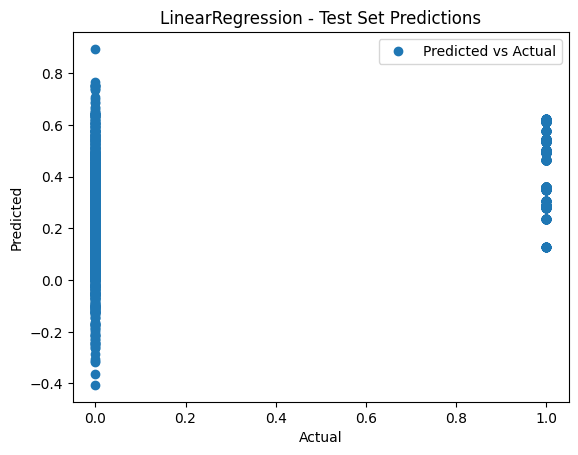

SGDRegressor: Train Loss=0.1691, Test Loss=0.1644, R2=0.2178


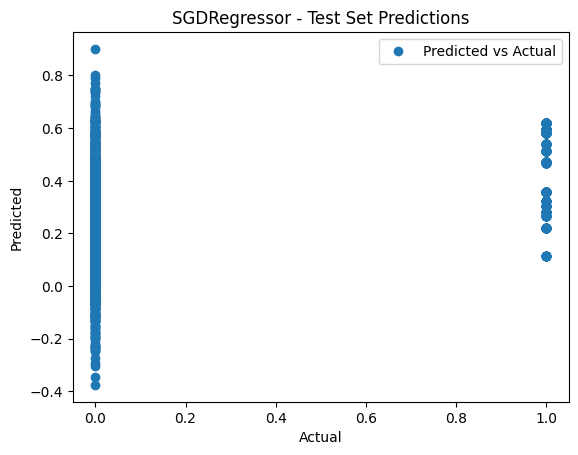

DecisionTree: Train Loss=0.0005, Test Loss=0.0021, R2=0.9900


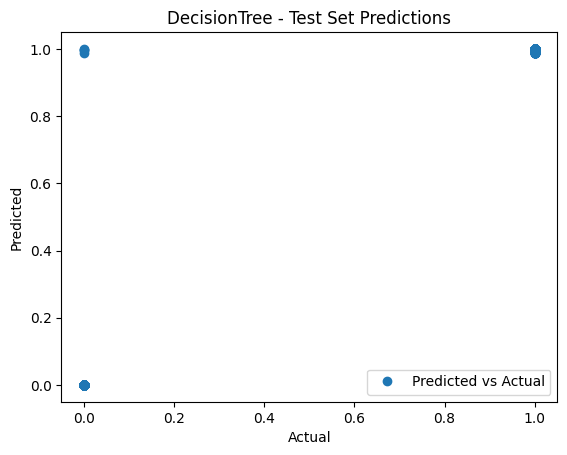

RandomForest: Train Loss=0.0007, Test Loss=0.0015, R2=0.9928


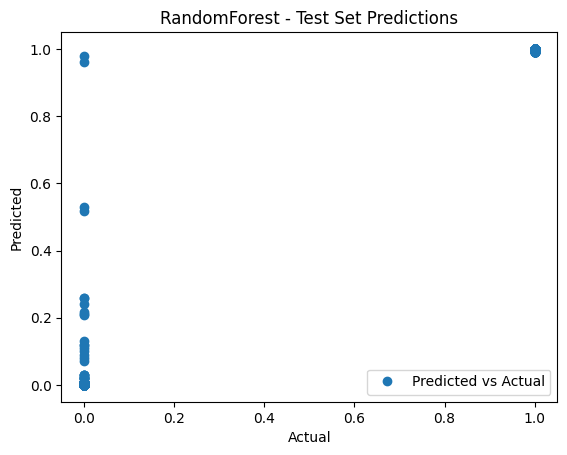

In [7]:
models = {
    'LinearRegression': LinearRegression(),
    'SGDRegressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_loss = mean_squared_error(y_train, y_pred_train)
    test_loss = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results[name] = {'train_loss': train_loss, 'test_loss': test_loss, 'r2': r2, 'model': model}
    print(f"{name}: Train Loss={train_loss:.4f}, Test Loss={test_loss:.4f}, R2={r2:.4f}")
    # Plot loss curve
    plt.figure()
    plt.plot(y_test.values, y_pred_test, 'o', label='Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Test Set Predictions')
    plt.legend()
    plt.show()

## 5. Visualize Best Model Performance
Plot a scatter plot of actual vs predicted values for the best-performing model.

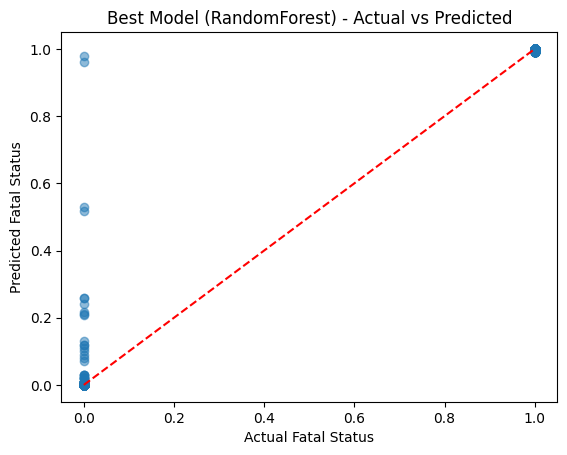

In [8]:
best_model_name = max(results, key=lambda k: results[k]['r2'])
best_model = results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([0,1],[0,1], color='red', linestyle='--')
plt.xlabel('Actual Fatal Status')
plt.ylabel('Predicted Fatal Status')
plt.title(f'Best Model ({best_model_name}) - Actual vs Predicted')
plt.show()

## 6. Save Best Model
Save the best-performing model for use in the API.

In [9]:
joblib.dump(best_model, 'API/best_crime_model.pkl')
print(f'Best model ({best_model_name}) saved as best_crime_model.pkl')

Best model (RandomForest) saved as best_crime_model.pkl
